In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split

In [2]:
import os
print(os.listdir(r'C:\Users\hp\OneDrive\Documents\bk'))

['bk.zip']


In [3]:
data=pd.read_csv('bk.zip')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [4]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
data2=data.drop(['day','month','duration'],axis=1)

In [7]:
#cheaked shpe of data set
data2.shape

(45211, 14)

In [8]:
data2.isna().sum() 
#cheaked missing value

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
data2['y'].value_counts()
#cheaked count of client term deposite or not

no     39922
yes     5289
Name: y, dtype: int64

Data is not proper balance anyway lets go further

In [10]:
# cheaked size of data set
data2.size

632954

In [11]:
# cheaked information of data set 
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  y          45211 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


# VISUALIZATION AND UNIVARIATE ANALYASIS

no     39922
yes     5289
Name: y, dtype: int64

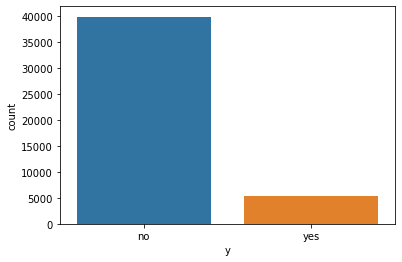

In [12]:
sb.countplot(x='y',data=data2)
data2['y'].value_counts()

 From above countplot, we can understand that nearly 39922 customers have not subscribed to the term deposite but only about 5289 have.

The data is not balanced since number of customers of negative (no) category is much more than positive (Yes) c

<AxesSubplot:xlabel='job', ylabel='count'>

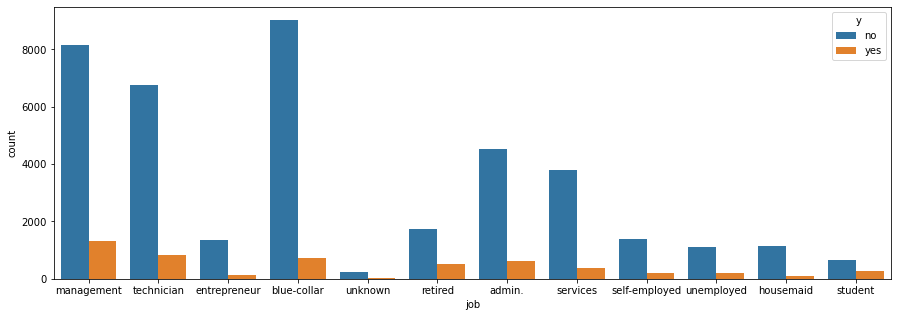

In [13]:
plt.figure(figsize=(15,5))
sb.countplot(x='job',data=data,hue='y')

1) From this plot, we can conclude that 'Management', 'Technician' and 'Blue-Collar' are top three job profiles who have highest number of custemores who have subscribed to term deposite as well as the customers who have not subscribed to term deposite.

2) 'unknown' job profile has the lowest number of customers subscribed to term deposite as well who have not not subscribed.

3) The rate of not subscribing is lowest in job profiles as 'entrepreneur', 'self-employed', 'unemployed', 'housemaid'

39.0

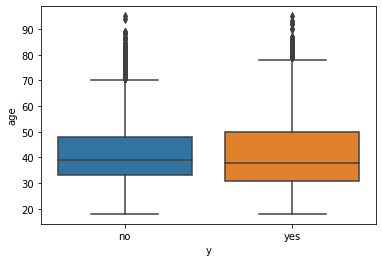

In [14]:
sb.boxplot(data=data,x='y',y='age')
data['age'].median()

From this boxplot, we conclude that the customers who have subscribed and not-subscribed has median-age around 39

<AxesSubplot:xlabel='education', ylabel='count'>

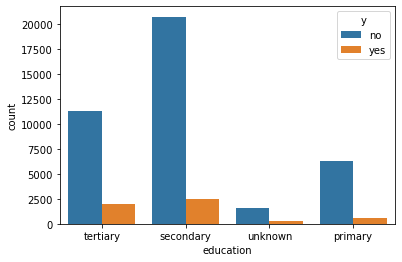

In [15]:
sb.countplot(x='education',data=data,hue='y')

Majority of customers having 'secondary' or 'tertiary' education subscribed to term deposite.

<AxesSubplot:xlabel='housing', ylabel='count'>

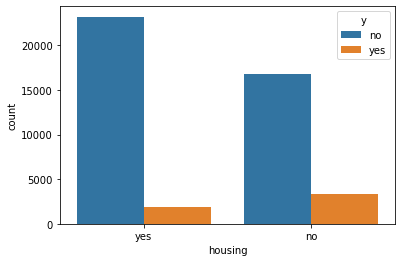

In [16]:
sb.countplot(x='housing',data=data,hue='y')

As we can see, the number of customers subscribed to term deposite who has housing is less than that that of cust

<AxesSubplot:xlabel='loan', ylabel='count'>

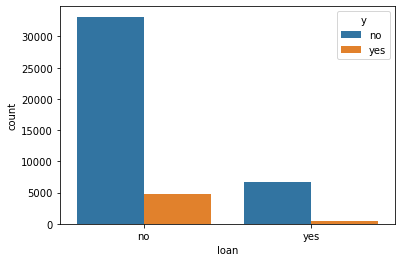

In [17]:
sb.countplot(x='loan',data=data,hue='y')

Very few customers who are having personal loan subscribed to term deposite.


<AxesSubplot:xlabel='contact', ylabel='count'>

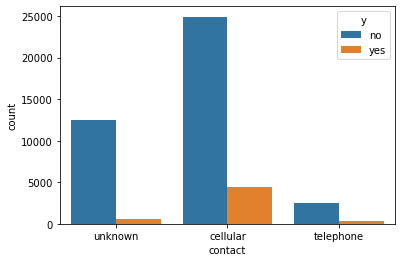

In [18]:
sb.countplot(x='contact',data=data,hue='y')

Cellular contcat' was the most used communication mode used to contact the customers,has subcribe more than unknown and telephone

<AxesSubplot:xlabel='poutcome', ylabel='count'>

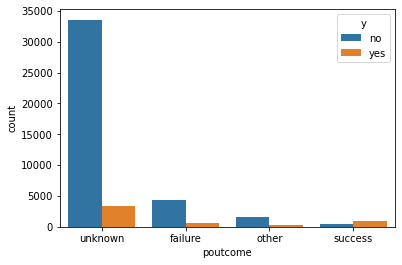

In [19]:
sb.countplot(x='poutcome',data=data,hue='y')

1) Above countplot shows the outcome of the previous marketing campaign.

2) We can say most of the customers are new i.e. they are not contacted previously and hence their marketing campaign is 'unkown'.

3) Very few people subscribed to term deposite in 'Failure' markteing campaign, where as the rate of customers who

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

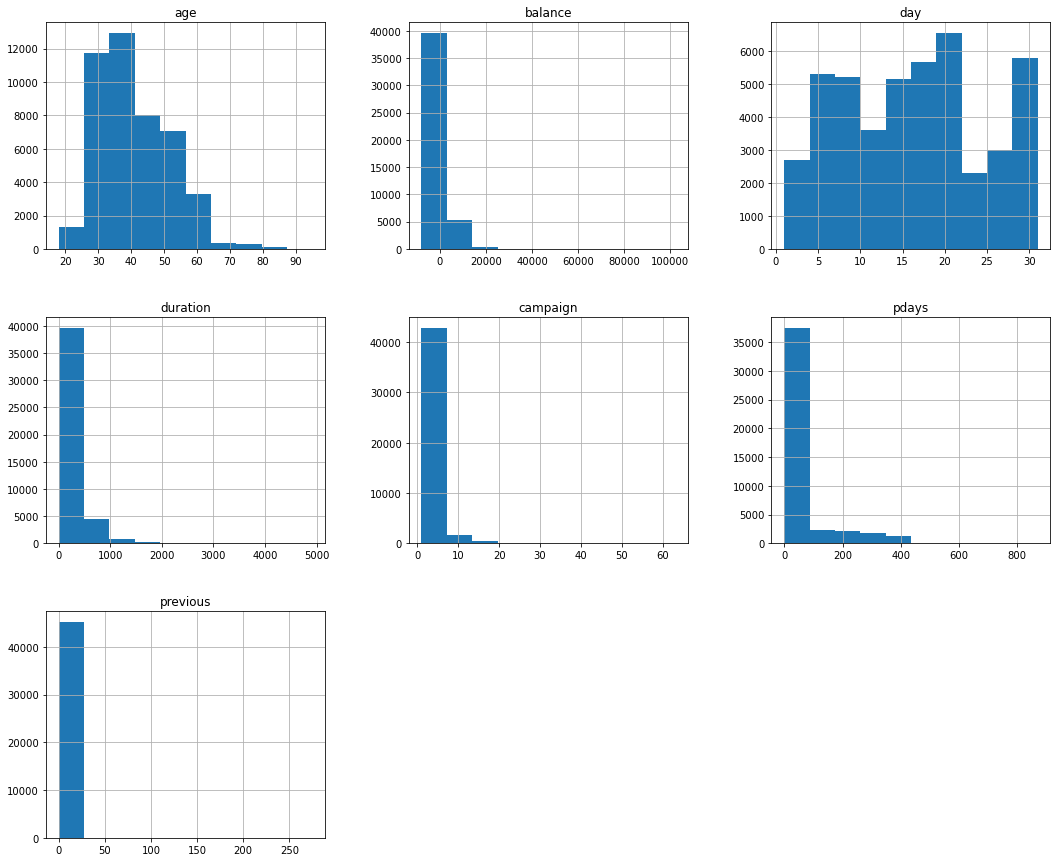

In [20]:
data.hist(figsize=(18,15))

# Changing data type 

In [21]:
data['job']=data['job'].astype('category')
data['marital']=data['marital'].astype('category')
data['education']=data['education'].astype('category')
data['default']=data['default'].astype('category')
data['housing']=data['housing'].astype('category')
data['loan']=data['loan'].astype('category')
data['contact']=data['contact'].astype('category')
data['month']=data['month'].astype('category')
data['poutcome']=data['poutcome'].astype('category')
data['y']=data['y'].astype('category')

In [22]:
data3=data

In [23]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [24]:
#Label Encoding
data3['job'] = data3['job'].cat.codes
data3['marital'] = data3['marital'].cat.codes
data3['education'] = data3['education'].cat.codes
data3['default'] = data3['default'].cat.codes
data3['housing'] = data3['housing'].cat.codes
data3['loan'] = data3['loan'].cat.codes
data3['contact'] = data3['contact'].cat.codes
data3['month'] = data3['month'].cat.codes
data3['poutcome'] = data3['poutcome'].cat.codes
data3['y'] = data3['y'].cat.codes

In [25]:
data3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [26]:
# Dividing our data into input and output variables
x = data3.iloc[:,:-1]  #all independent features
y = data3.iloc[:,16]   #Target variable

In [27]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [28]:
x1 = x.clip(lower=0) # Replacing all negative values of x with 0

# freture selection
corelation matix and heatmap

In [29]:
CRMX = data3.corr()
CRMX

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [30]:
top_corr_features =CRMX.index 

# plot heat map

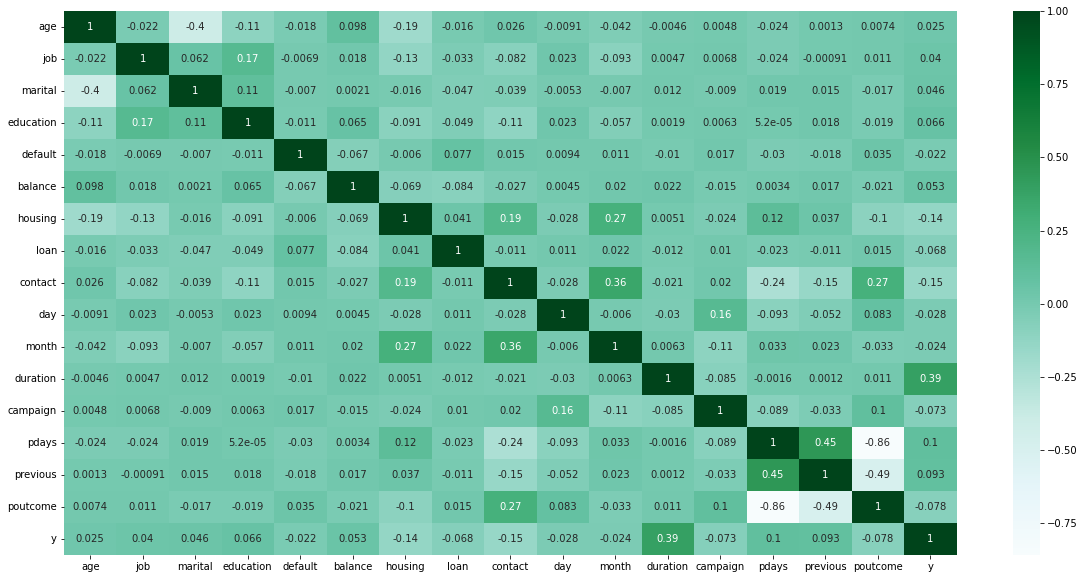

In [31]:
plt.figure(figsize=(20,10))
heatmap=sb.heatmap(data3[top_corr_features].corr(),annot=True,cmap="BuGn")

# Univariant Selection using SelectKBest

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [33]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x1,y)

In [34]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x1.columns)

In [35]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [36]:
featureScores.columns = ['Specs','Score'] #naming the dataframe columns


In [37]:
print(featureScores.nlargest(10,'Score')) #print 10 best features

       Specs         Score
11  duration  1.807711e+06
5    balance  7.884598e+05
13     pdays  1.171871e+05
14  previous  3.593220e+03
8    contact  1.253814e+03
12  campaign  8.405821e+02
6    housing  3.889497e+02
1        job  1.824523e+02
7       loan  1.765161e+02
9        day  1.592004e+02


In [38]:
# .These are the best 10 features that can contribute to achieve better accuracy for our model

In [39]:
bk_x = x1[['duration', 'balance', 'pdays', 'previous', 'contact', 'campaign', 'housing', 'job', 'loan', 'day']]
bk_x.head(5)


,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
0,261,2143,0,0,2,1,1,4,0,5
1,151,29,0,0,2,1,1,9,0,5
2,76,2,0,0,2,1,1,2,1,5
3,92,1506,0,0,2,1,1,1,0,5
4,198,1,0,0,2,1,0,11,0,5


In [40]:
bk_x.describe()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,258.163080,1388.734069,41.015195,0.580323,0.640242,2.763841,0.555838,4.339762,0.160226,15.806419
std,257.527812,3029.530442,99.792615,2.303441,0.897951,3.098021,0.496878,3.272657,0.366820,8.322476
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,103.000000,72.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,8.000000
50%,180.000000,448.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,16.000000
75%,319.000000,1428.000000,0.000000,0.000000,2.000000,3.000000,1.000000,7.000000,0.000000,21.000000
max,4918.000000,102127.000000,871.000000,275.000000,2.000000,63.000000,1.000000,11.000000,1.000000,31.000000


In [41]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int8

In [42]:
bk_x.corr()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
duration,1.000000,0.021325,-0.001584,0.001203,-0.020839,-0.084570,0.005075,0.004744,-0.012412,-0.030206
balance,0.021325,1.000000,0.002627,0.016018,-0.025614,-0.014164,-0.065279,0.017850,-0.079532,0.005788
pdays,-0.001584,0.002627,1.000000,0.454288,-0.244526,-0.088508,0.124350,-0.024531,-0.022709,-0.093024
previous,0.001203,0.016018,0.454288,1.000000,-0.147811,-0.032855,0.037076,-0.000911,-0.011043,-0.051710
contact,-0.020839,-0.025614,-0.244526,-0.147811,1.000000,0.019614,0.188123,-0.082063,-0.010873,-0.027936
campaign,-0.084570,-0.014164,-0.088508,-0.032855,0.019614,1.000000,-0.023599,0.006839,0.009980,0.162490
housing,0.005075,-0.065279,0.124350,0.037076,0.188123,-0.023599,1.000000,-0.125363,0.041323,-0.027982
job,0.004744,0.017850,-0.024531,-0.000911,-0.082063,0.006839,-0.125363,1.000000,-0.033004,0.022856
loan,-0.012412,-0.079532,-0.022709,-0.011043,-0.010873,0.009980,0.041323,-0.033004,1.000000,0.011370
day,-0.030206,0.005788,-0.093024,-0.051710,-0.027936,0.162490,-0.027982,0.022856,0.011370,1.000000


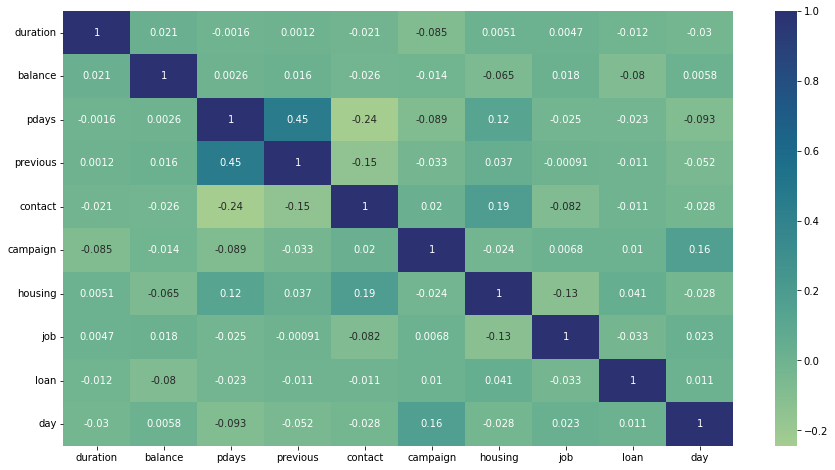

In [43]:
plt.figure(figsize=(15,8))
g1 = sb.heatmap(bk_x.corr(), annot=True, cmap= 'crest')

1) Above heatmap shows the correlation between the significant features.

2) We can say that there's a bit relatively strong relation between features 'previous' and 'pdays' as compared to other features.

3) Also the relation between features 'contact' and 'pdays' is the weakest among all.

# Model Building

# Classifier 1

# statsmodel-logit

In [44]:
classifier1 = sm.Logit(y, bk_x).fit()

Optimization terminated successfully.
         Current function value: 0.292027
         Iterations 8


In [45]:
classifier1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45201
Method:                           MLE   Df Model:                            9
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.1908
Time:                        12:35:58   Log-Likelihood:                -13203.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.0033   5.71e-05     57.265      0.000       0.003       0.003
balance     -1.06e-05   4.92e-06     -2.154      0.031   -2.03e-05   -9.55e-07
pdays          0.0007      0.000      4.418      0.000       0.000       0.001
previous       0.0633      0.008      7.973      0.000       0.048       0.079
contact       -0.7889      0.025    -32.092      0.000      -0.837      -0.741
campaign      -0.3301      0.011    -28.950      0.000      -0.352      -0.308
housing       -1.4508      0.034    -42.724      0.000      -1.517      -1.384
job           -0.0937      0.005    -20.621      0.000      -0.103      -0.085
loan          -1.0626      0.055    -19.331      0.000      -1.170      -0.955
day           -0.0517      0.002    -30.179      0.000      -0.055      -0.048
==============================================================================
"""

In [46]:
classifier1.params

duration    0.003271
balance    -0.000011
pdays       0.000733
previous    0.063267
contact    -0.788923
campaign   -0.330111
housing    -1.450791
job        -0.093711
loan       -1.062574
day        -0.051714
dtype: float64

In [47]:
y_pred1 = classifier1.predict(bk_x)
y_pred1.head(4)

0    0.040651
1    0.018576
2    0.009769
3    0.031490
dtype: float64

In [48]:
y_pred1 = list(map(round, y_pred1))
y_pred1 = pd.DataFrame(y_pred1)

In [49]:
prediction1 = pd.concat([y,y_pred1], axis = 1)
prediction1.head(5)

,y,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [50]:
prediction1.tail(5)

,y,0
45206,1,1
45207,1,0
45208,1,1
45209,0,0
45210,0,1


In [51]:
prediction1

,y,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Classifer 2

# Normalizing 'bank_x'

In [52]:
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(bk_x)
scaled_x = scalar.transform(bk_x)

In [53]:
scaled_x

array([[5.30703538e-02, 2.09836772e-02, 0.00000000e+00, ...,
        3.63636364e-01, 0.00000000e+00, 1.33333333e-01],
       [3.07035380e-02, 2.83960167e-04, 0.00000000e+00, ...,
        8.18181818e-01, 0.00000000e+00, 1.33333333e-01],
       [1.54534364e-02, 1.95834598e-05, 0.00000000e+00, ...,
        1.81818182e-01, 1.00000000e+00, 1.33333333e-01],
       ...,
       [2.29158194e-01, 5.59597364e-02, 2.11251435e-01, ...,
        4.54545455e-01, 0.00000000e+00, 5.33333333e-01],
       [1.03294022e-01, 6.54087558e-03, 0.00000000e+00, ...,
        9.09090909e-02, 0.00000000e+00, 5.33333333e-01],
       [7.34038227e-02, 2.90912295e-02, 2.15843858e-01, ...,
        1.81818182e-01, 0.00000000e+00, 5.33333333e-01]])

In [54]:
classifier2 = LogisticRegression()
classifier2.fit(scaled_x,y)

LogisticRegression()

In [55]:
classifier2.coef_


array([[17.72273709,  2.00537386,  2.32192876,  3.68882538, -1.16168868,
        -6.09988223, -1.03019879,  0.1610244 , -0.7190179 , -0.16780812]])

In [56]:
proba = classifier2.predict_proba(scaled_x)
proba

array([[0.97326394, 0.02673606],
       [0.98128176, 0.01871824],
       [0.99364193, 0.00635807],
       ...,
       [0.13320987, 0.86679013],
       [0.82180956, 0.17819044],
       [0.63926829, 0.36073171]])

In [57]:
y_pred2 = classifier2.predict(scaled_x)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

# Model validation

In [58]:
confusion_matrix = confusion_matrix(y,y_pred2)
print(confusion_matrix)

[[39265   657]
 [ 4303   986]]


In [59]:
pd.crosstab(y,y_pred2)

col_0,0,1
y,,
0,39265,657
1,4303,986


In [60]:
((39265+986)/(39265+986+657+4303))*100

89.02921855300701

In [61]:
accuracy = sum(y==y_pred2)/data.shape[0] #bank.shape[0] : All rows
accuracy

0.8902921855300702

In [62]:
print( classification_report(y,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.19      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



In [63]:
roc_score = roc_auc_score(y, y_pred2)
roc_score

0.584983781808067

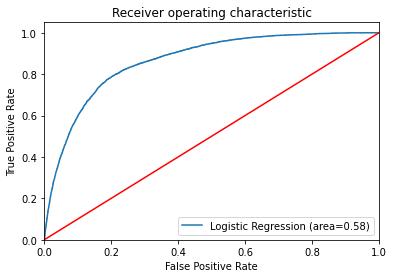

In [64]:
fpr, tpr, thresholds = roc_curve(y,proba[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score)
plt.plot([0, 1], [0, 1],'r-') # 'r-' : red coloured dash line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [65]:
fpr

array([0.00000000e+00, 2.50488452e-05, 2.50488452e-05, ...,
       9.88452482e-01, 9.88452482e-01, 1.00000000e+00])

In [66]:
tpr

array([0.00000000e+00, 0.00000000e+00, 1.89071658e-04, ...,
       9.99810928e-01, 1.00000000e+00, 1.00000000e+00])

# Improving classifier 2

In [67]:
model1 = LogisticRegression(solver='saga', C=20.0, random_state=1)
model1.fit(scaled_x, y)

LogisticRegression(C=20.0, random_state=1, solver='saga')

In [68]:
new_prob = model1.predict_proba(scaled_x)
new_prob

array([[0.97466396, 0.02533604],
       [0.98294935, 0.01705065],
       [0.99446154, 0.00553846],
       ...,
       [0.1096837 , 0.8903163 ],
       [0.82672132, 0.17327868],
       [0.52685741, 0.47314259]])

In [69]:
y_pred3 = model1.predict(scaled_x)
y_pred3

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [70]:
model1.score(scaled_x, y)

0.8908451483046161

In [71]:
cr = classification_report(y,y_pred3)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



In [72]:
roc_score1 = roc_auc_score(y, y_pred3)
roc_score1

0.5938260786450008

In [73]:
# .Here, we got an improved model just by setting up parameters for LogisticRegression() model.
# .We can see an improved score of 0.890845 and improved roc_score of 0.593826 as compared to classifier 2

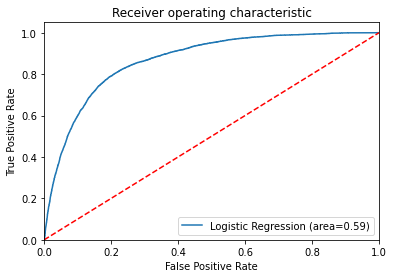

In [74]:
fpr, tpr, thresholds = roc_curve(y,new_prob[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [75]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.93437203e-01, 9.93437203e-01, 1.00000000e+00])

In [76]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [77]:
bk_x.shape

(45211, 10)

In [78]:
y.shape

(45211,)

In [79]:
x3 = bk_x.values
y3 = y.values

In [80]:
# Splitting the data for training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x3, y3, test_size = 0.20, random_state = 10)

# standerzing 'xtrain' and 'xtest'

In [81]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)


In [82]:
print(xtrain[0:5,:])

[[-0.30738733 -0.45356646 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326  1.42538934 -0.43702462  0.62689417]
 [-0.29571388  0.01207209 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326 -1.01971428  2.28820062 -0.93643115]
 [-0.92218909 -0.40758954 -0.41189017 -0.24419181  1.51764318  2.34210565
   0.89399326 -1.01971428  2.28820062 -0.21489639]
 [ 0.43193125 -0.35900401 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [-0.33073423  2.16809592 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326 -1.01971428 -0.43702462 -0.33515218]]


In [83]:
print(xtest[0:5,:])

[[ 0.41636665 -0.45356646 -0.41189017 -0.24419181  1.51764318  0.39881633
   0.89399326  1.42538934 -0.43702462  0.50663838]
 [-0.73930502  0.13989443 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [ 2.52147902  0.28108595 -0.41189017 -0.24419181  1.51764318 -0.24894678
   0.89399326 -0.10280042 -0.43702462  0.26612679]
 [-0.25291122  1.97538417 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326  1.42538934 -0.43702462 -1.05668694]
 [ 0.69652948 -0.43432789 -0.41189017 -0.24419181  1.51764318 -0.24894678
  -1.11857666 -0.71407633 -0.43702462 -0.33515218]]


# Model Building

In [84]:
classifier3 = LogisticRegression(C = 10, random_state = 10, solver = 'lbfgs', n_jobs = 10)
classifier3.fit(xtrain, ytrain)

LogisticRegression(C=10, n_jobs=10, random_state=10)

In [85]:
y_pred4 = classifier3.predict(xtest)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [86]:
# Printing Confusion Matrix
conf_matrix3 =confusion_matrix[ytest ,y_pred4]
conf_matrix3

array([39265, 39265, 39265, ..., 39265, 39265, 39265], dtype=int64)

In [87]:
pd.crosstab(ytest,y_pred4)

col_0,0,1
row_0,,
0,7851,143
1,836,213


In [88]:
# probability prediction for target variable
y_prob3 = classifier3.predict_proba(xtest)
y_prob3

array([[0.97617463, 0.02382537],
       [0.98889506, 0.01110494],
       [0.787309  , 0.212691  ],
       ...,
       [0.95289641, 0.04710359],
       [0.96570544, 0.03429456],
       [0.85684936, 0.14315064]])

# Model Validation

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred4)

0.8917394669910428

In [90]:
roc_score3 = roc_auc_score(ytest, y_pred4)
roc_score3


0.5925810539983157

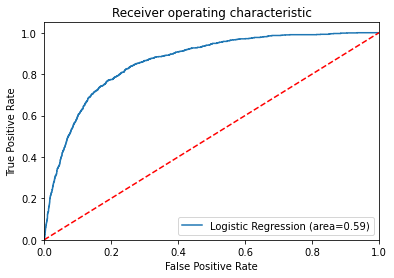

In [91]:
fpr, tpr, thresholds = roc_curve(ytest,y_prob3[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [92]:
cr3 = classification_report(ytest,y_pred4)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



In [93]:
fpr[:5,]

array([0.        , 0.00012509, 0.00012509, 0.00025019, 0.00025019])

In [94]:
tpr[:5,]

array([0.        , 0.        , 0.00381316, 0.00381316, 0.00571973])